In [1]:
# data = Original table
# df = Table after filling up missing values
# ds = table after converting categorical to numerical data

# Importing reguired libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Reading the data

In [3]:
data = pd.read_csv("C:/Users/Piyush Wadhawan/loan_data2.csv")
df=data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#data.describe()
#data.shape
#data.columns
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data.shape

(614, 13)

# Checking for null values

In [6]:
df=data
print(" \nCount of null values in each column: \n\n", 
      df.isnull().sum())

 
Count of null values in each column: 

 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


# Filling up missing values

In [7]:
import seaborn as sns
sns.countplot('Loan_Status',hue='Gender',data=df)

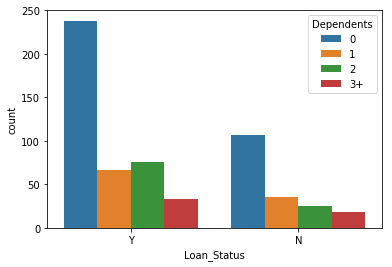

In [8]:
sns.countplot('Loan_Status',hue='Dependents',data=df)

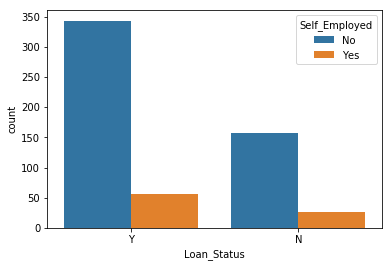

In [9]:
sns.countplot('Loan_Status',hue ='Self_Employed',data=df)

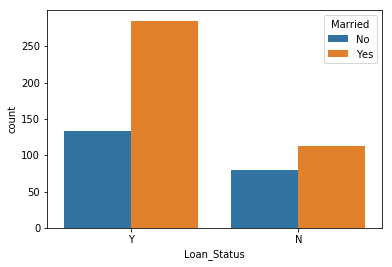

In [10]:
sns.countplot('Loan_Status',hue='Married',data=df)

In [11]:
df['Gender'] = df['Gender'].fillna('Male')
df['Dependents'] = df['Dependents'].fillna('0')
df['Self_Employed']=df['Self_Employed'].fillna('No')
df['Married'] = df['Married'].fillna('Yes')

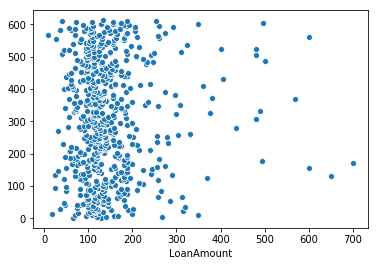

In [12]:
sns.scatterplot(df['LoanAmount'],y=np.arange(0,614))

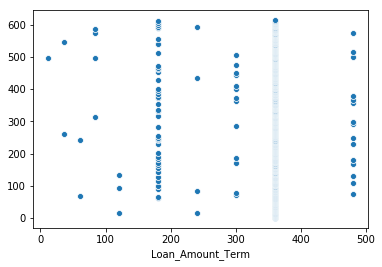

In [13]:
sns.scatterplot(df['Loan_Amount_Term'],y=np.arange(0,614))

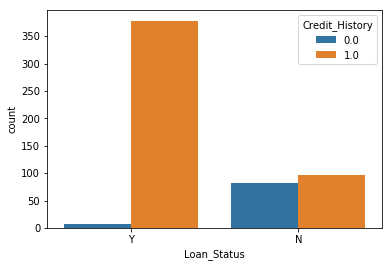

In [14]:
sns.countplot('Loan_Status',hue='Credit_History',data=df)

In [15]:
mean=df[df['LoanAmount']<=400]['LoanAmount'].mean()
df['LoanAmount'].fillna(mean,inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)

df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace=True)

# Checking if there are any null values left

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Converting categorical values to numerical values so that we can use sklearn

In [17]:
ds=df.replace(to_replace=["Yes","No"],value=['1','0'])
ds=ds.replace(to_replace=["Y","N"],value=['1','0'])
ds=ds.replace(to_replace=["Graduate","Not Graduate"],value=['1','0'])
ds=ds.replace(to_replace=["Rural","Semiurban","Urban"],value=['0','1','2'])
ds=ds.replace(to_replace=["Male","Female"],value=['1','0'])

ds.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,137.186851,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3+,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [18]:
x=ds[['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area']]
y=ds['Loan_Status']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Scalling values

In [20]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)
xtr = std.transform(x_train)
xts = std.transform(x_test)

C:\Users\Piyush Wadhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Piyush Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Piyush Wadhawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  """


# Logistic Regression Model

In [21]:
model = LogisticRegression()
model.fit(xtr , y_train)

C:\Users\Piyush Wadhawan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
predict = model.predict(xts)
print(predict)

['1' '1' '1' '1' '1' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '0'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '0' '1']


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[15 18]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

   micro avg       0.84      0.84      0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



# KNeighbors Classification Model

In [24]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)    # define the model
knn.fit(xtr,y_train)   # fit the model
pred_i = knn.predict(xts)

In [25]:
print(knn.score(xts,y_test))

0.8211382113821138


In [26]:
print(confusion_matrix(y_test,pred_i))
print(classification_report(y_test,pred_i))

[[14 19]
 [ 3 87]]
              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

   micro avg       0.82      0.82      0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



## finding the best K value

In [27]:
error_rate = []

# Will take some time
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtr,y_train)
    pred_i = knn.predict(xts)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\Piyush Wadhawan\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'Error Rate')

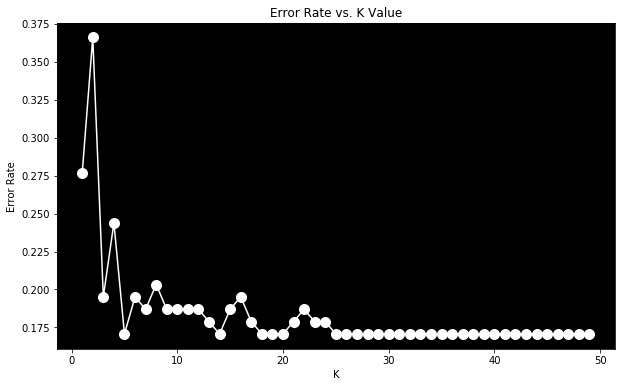

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='white', linestyle='solid', marker='o',markerfacecolor='white', markersize=10)
ax = plt.axes()
# Setting the background color
ax.set_facecolor("black")
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)
#Convert to table format - MinMaxScaler
df_MinMax = pd.DataFrame(data=scaled_features, columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

C:\Users\Piyush Wadhawan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
x_train,x_test,y_train,y_test=train_test_split(df_MinMax,y,test_size=0.2,random_state=0)
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)    # define the model
cv_scores = cross_val_score(knn, df_MinMax, y, cv=5)
print(cv_scores)
knn.fit(x_train,y_train)   # fit the model

[0.78225806 0.71774194 0.76229508 0.83606557 0.79508197]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')